<a href="https://colab.research.google.com/github/sravanreddy6745/Mini-Project/blob/master/traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import random
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
os.getcwd()

'/gdrive'

In [ ]:
with open("/gdrive/My Drive/Traffic-Sign-Classification/traffic-signs-data/train.p",mode='rb') as training_data:
  train=pickle.load(training_data)
with open("/gdrive/My Drive/Traffic-Sign-Classification/traffic-signs-data/test.p",mode='rb') as test_data:
  test=pickle.load(test_data)
with open("/gdrive/My Drive/Traffic-Sign-Classification/traffic-signs-data/valid.p",mode='rb') as validation_data:
  validation=pickle.load(validation_data)

In [ ]:
X_train,y_train=train['features'],train['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

In [ ]:
X_valid,y_valid=validation['features'],validation['labels']

In [ ]:
X_test,y_test=test['features'],test['labels']

In [ ]:
X_valid.shape,y_valid.shape

((4410, 32, 32, 3), (4410,))

In [ ]:
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

Image Visualisation


15

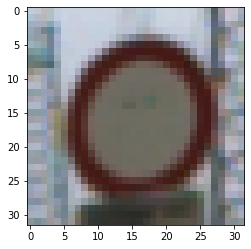

In [ ]:
i=np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
y_train[i]

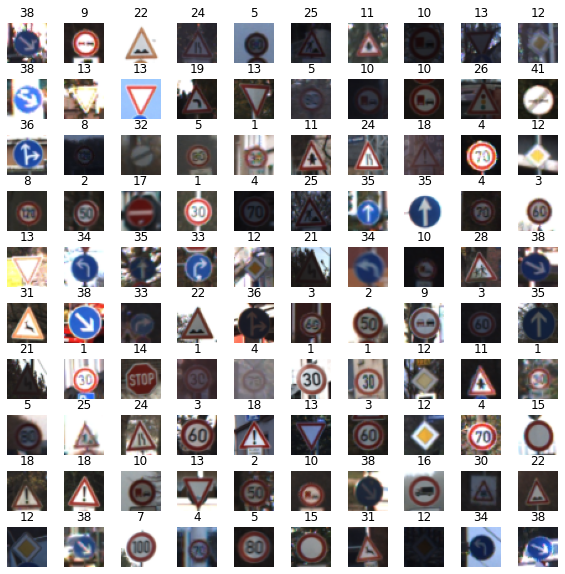

In [ ]:
width=10
length=10
fig,axes=plt.subplots(length,width,figsize=(10,10))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,width*length):
  index=np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)


In [ ]:
from sklearn.utils import shuffle

In [ ]:
X_train,y_train=shuffle(X_train,y_train)

In [ ]:
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_train_norm=(X_train_gray-128)/128

In [ ]:
X_train_norm

array([[[[-0.37239583],
         [-0.35677083],
         [-0.2578125 ],
         ...,
         [ 0.61979167],
         [ 0.82552083],
         [ 0.9375    ]],

        [[-0.375     ],
         [-0.375     ],
         [-0.30208333],
         ...,
         [ 0.73177083],
         [ 0.8125    ],
         [ 0.70572917]],

        [[ 0.08072917],
         [-0.06510417],
         [-0.16927083],
         ...,
         [ 0.43229167],
         [ 0.25520833],
         [ 0.1015625 ]],

        ...,

        [[-0.6796875 ],
         [-0.65885417],
         [-0.54427083],
         ...,
         [-0.71354167],
         [-0.77604167],
         [-0.78125   ]],

        [[-0.6640625 ],
         [-0.64322917],
         [-0.5859375 ],
         ...,
         [-0.7421875 ],
         [-0.76822917],
         [-0.7734375 ]],

        [[-0.64322917],
         [-0.66927083],
         [-0.69010417],
         ...,
         [-0.7421875 ],
         [-0.76041667],
         [-0.7734375 ]]],


       [[[ 0.15104167],


In [ ]:
X_test,y_test=shuffle(X_test,y_test)

In [ ]:
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_test_gray.shape

(12630, 32, 32, 1)

In [ ]:
X_test_norm=(X_test_gray-128)/128

In [ ]:
X_test_norm

array([[[[ 0.13802083],
         [ 0.03645833],
         [-0.1796875 ],
         ...,
         [-0.49479167],
         [-0.46354167],
         [-0.38020833]],

        [[ 0.05208333],
         [-0.140625  ],
         [-0.38802083],
         ...,
         [-0.1328125 ],
         [-0.1171875 ],
         [-0.14322917]],

        [[-0.125     ],
         [-0.25260417],
         [-0.34114583],
         ...,
         [-0.13802083],
         [-0.1875    ],
         [-0.1953125 ]],

        ...,

        [[-0.625     ],
         [-0.57552083],
         [-0.57552083],
         ...,
         [-0.41666667],
         [-0.375     ],
         [-0.41145833]],

        [[-0.6015625 ],
         [-0.5859375 ],
         [-0.5703125 ],
         ...,
         [-0.33854167],
         [-0.38802083],
         [-0.44010417]],

        [[-0.625     ],
         [-0.6015625 ],
         [-0.58854167],
         ...,
         [-0.51041667],
         [-0.4296875 ],
         [-0.39322917]]],


       [[[-0.68229167],


In [ ]:
X_valid,y_valid=shuffle(X_valid,y_valid)

In [ ]:
X_valid_gray=np.sum(X_valid/3,axis=3,keepdims=True)

In [ ]:
X_valid_norm=(X_valid_gray-128)/128

In [ ]:
X_valid_gray.shape

(4410, 32, 32, 1)

In [ ]:
X_valid_norm

array([[[[-0.6484375 ],
         [-0.6875    ],
         [-0.69791667],
         ...,
         [-0.32552083],
         [-0.15364583],
         [-0.42708333]],

        [[-0.65885417],
         [-0.69010417],
         [-0.71875   ],
         ...,
         [-0.33333333],
         [-0.125     ],
         [-0.40104167]],

        [[-0.68489583],
         [-0.69791667],
         [-0.71614583],
         ...,
         [-0.36458333],
         [-0.15885417],
         [-0.38020833]],

        ...,

        [[-0.59635417],
         [-0.56770833],
         [-0.58072917],
         ...,
         [-0.5       ],
         [-0.49479167],
         [-0.47916667]],

        [[-0.65104167],
         [-0.44791667],
         [-0.38541667],
         ...,
         [-0.51822917],
         [-0.5390625 ],
         [-0.54947917]],

        [[-0.74739583],
         [-0.52083333],
         [-0.46614583],
         ...,
         [-0.53385417],
         [-0.5390625 ],
         [-0.55208333]]],


       [[[ 0.33333333],


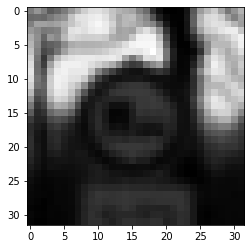

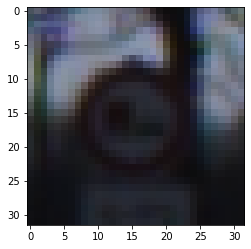

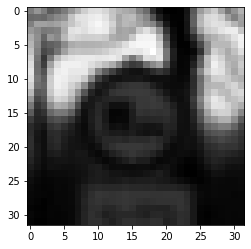

In [ ]:
i=np.random.randint(1,len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_norm[i].squeeze(),cmap='gray')
#plt.figure()

In [41]:
from tensorflow.keras import layers,datasets,models
model=models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(32,32,1)))
model.add(layers.Conv2D(32, (5,5), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
#model.add(layers.Dropout(rate=0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(43, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)         

In [42]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [43]:
history = model.fit(X_train_norm, y_train, batch_size=100, epochs=15, validation_data=(X_valid_norm, y_valid))


Epoch 1/15
348/348 [==============================] - 3s 8ms/step - loss: 0.8988 - accuracy: 0.7545 - val_loss: 0.2318 - val_accuracy: 0.9342
Epoch 2/15
348/348 [==============================] - 2s 6ms/step - loss: 0.1037 - accuracy: 0.9706 - val_loss: 0.1493 - val_accuracy: 0.9596
Epoch 3/15
348/348 [==============================] - 2s 6ms/step - loss: 0.0532 - accuracy: 0.9845 - val_loss: 0.1451 - val_accuracy: 0.9660
Epoch 4/15
348/348 [==============================] - 2s 6ms/step - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.1342 - val_accuracy: 0.9683
Epoch 5/15
348/348 [==============================] - 2s 6ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.1303 - val_accuracy: 0.9701
Epoch 6/15
348/348 [==============================] - 2s 6ms/step - loss: 0.0225 - accuracy: 0.9930 - val_loss: 0.1114 - val_accuracy: 0.9771
Epoch 7/15
348/348 [==============================] - 2s 6ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.1404 - val_accuracy: 0.9701
Epoch 

In [44]:
score=model.evaluate(X_test_norm,y_test)

395/395 [==============================] - 1s 3ms/step - loss: 0.3047 - accuracy: 0.9534


In [45]:
score

[0.30474478006362915, 0.9533650279045105]

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']

accuracy

[0.7544757127761841,
 0.9706026315689087,
 0.984539806842804,
 0.9883617162704468,
 0.9913215637207031,
 0.9929882884025574,
 0.9924135804176331,
 0.994310200214386,
 0.9928733706474304,
 0.9936492443084717,
 0.9955458641052246,
 0.9947412014007568,
 0.9963504672050476,
 0.9962642788887024,
 0.9963791966438293]

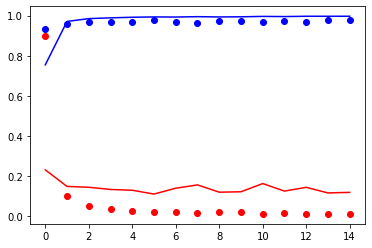

In [50]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label="Training Loss")
plt.plot(epochs,val_loss,'r',label="validation Loss")
plt.plot(epochs, val_accuracy,'bo',label="validation accuracy")
plt.plot(epochs,accuracy,'b',label="accuracy")

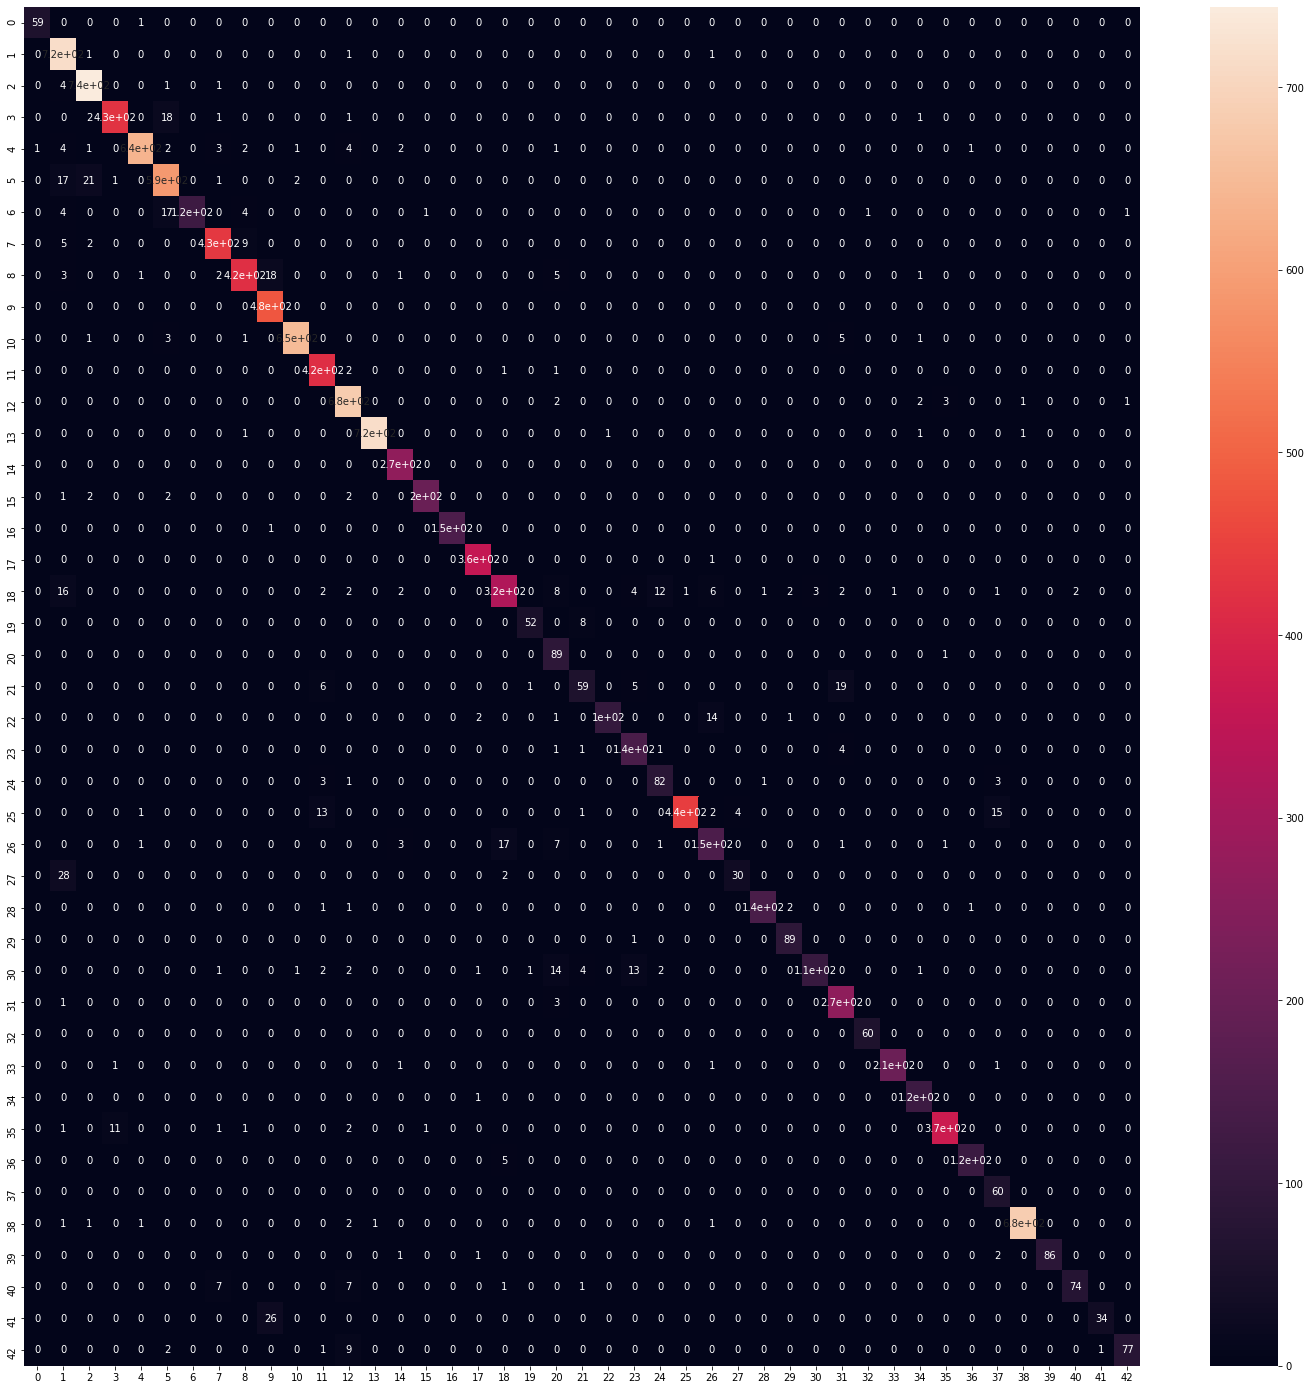

In [52]:
predicted_classes=model.predict_classes(X_test_norm)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True) 

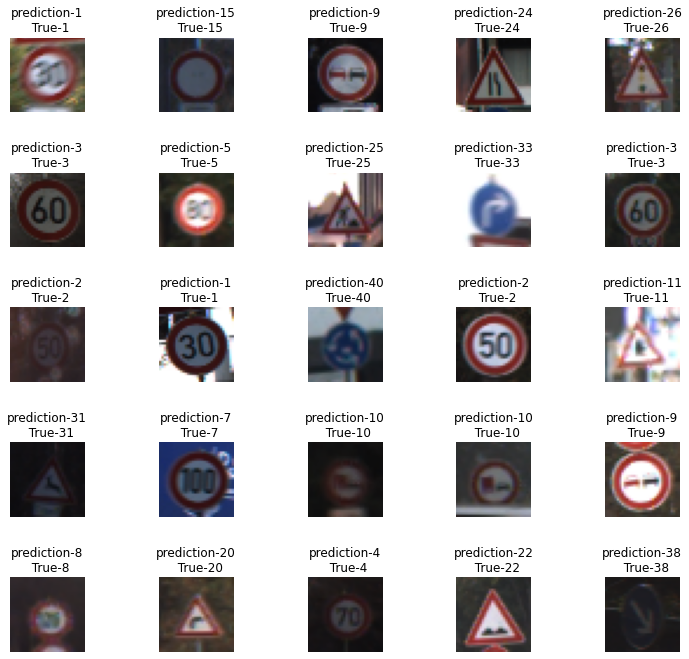

In [58]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,l*w):
  axes[i].imshow(X_test[i])
  axes[i].set_title('prediction-{}\n  True-{}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)


In [63]:
model.save('/gdrive/My Drive/Traffic-Sign-Classification/Code')

INFO:tensorflow:Assets written to: /gdrive/My Drive/Traffic-Sign-Classification/Code/assets


In [66]:
new_model = models.load_model('/gdrive/My Drive/Traffic-Sign-Classification/Code')

In [67]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)         

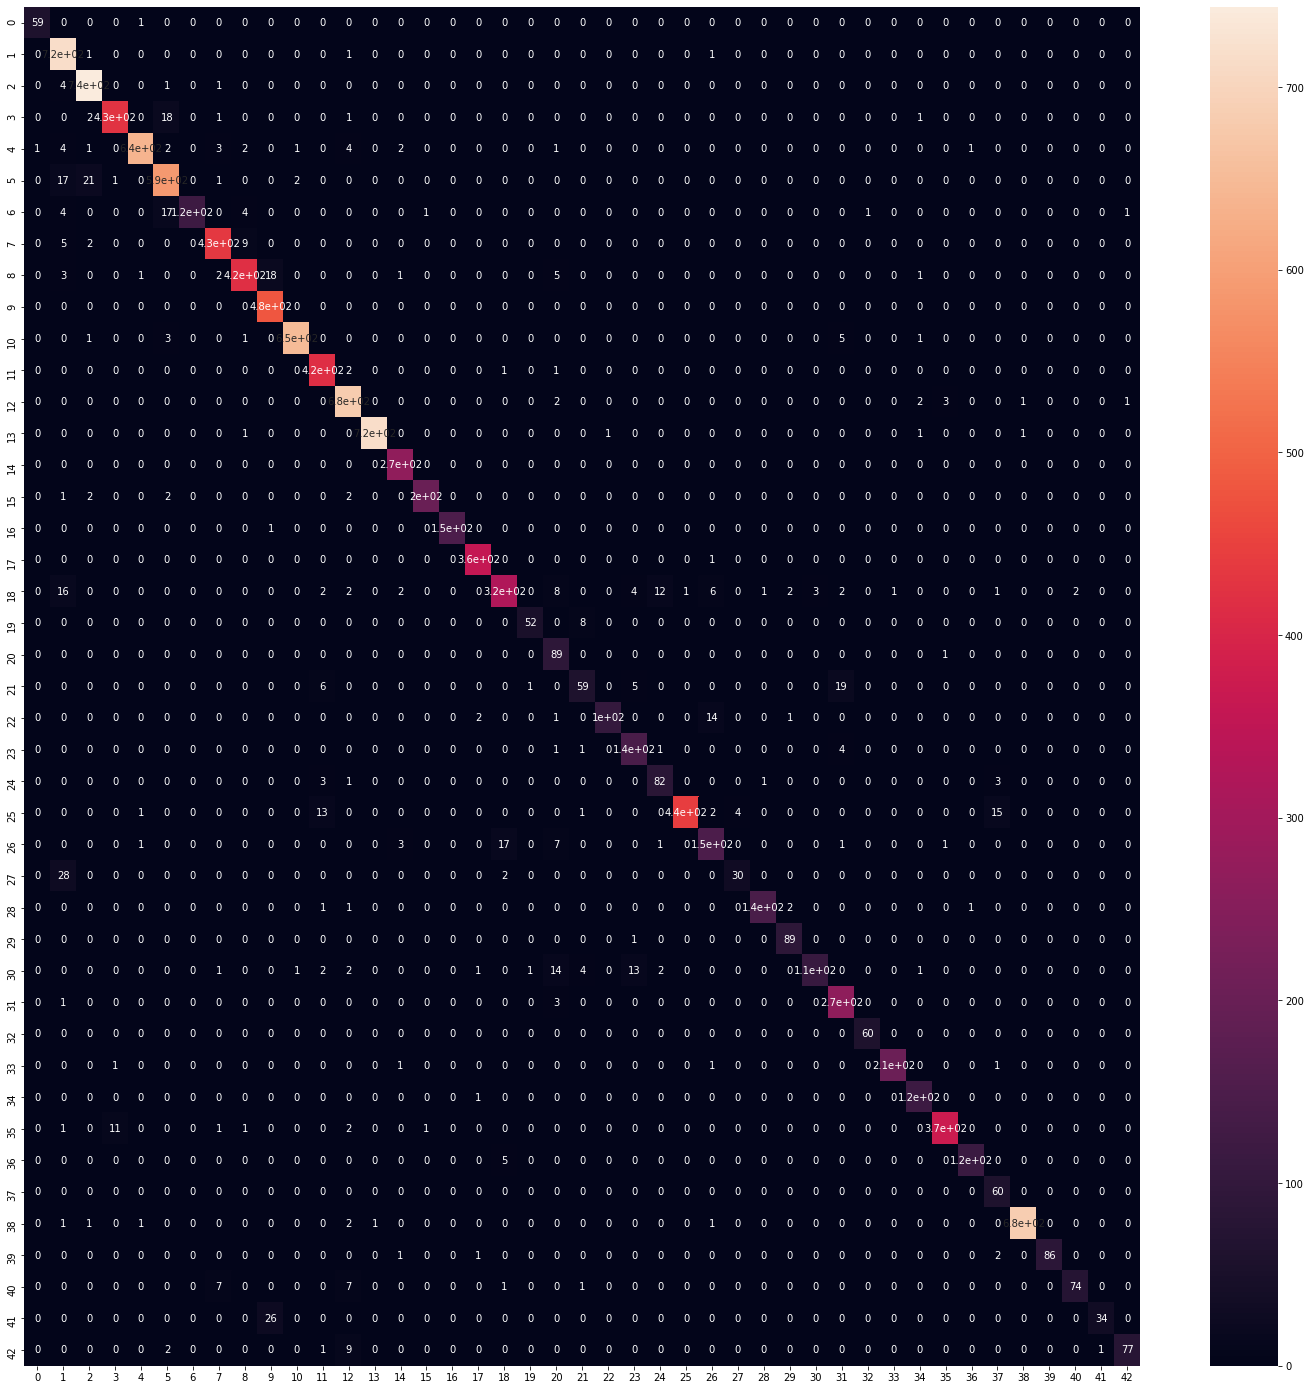

In [68]:
predicted_classes=new_model.predict_classes(X_test_norm)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True) 